# **Image Enhancement-Image Histogram**

import required packages necessary for image processing








In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow==2.3.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 19 kB/s 
     |████████████████████████████████| 2.9 MB 68.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.1 MB/s 
     |████████████████████████████████| 459 kB 85.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall

In [ ]:
pip install keras==2.3.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 31.9 MB/s 
     |████████████████████████████████| 50 kB 8.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [ ]:
pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Image Pre Processing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip = True)

In [ ]:
test_datagen =ImageDataGenerator(rescale=1)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

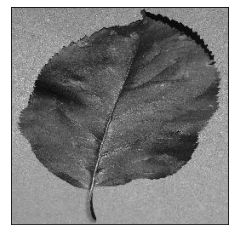

In [ ]:
img = cv2.imread('/content/15f31b47-61da-4549-ad60-f13ef13a6512___JR_FrgE.S 8734.JPG',0)
plt.imshow(img, cmap='gray'),plt.grid(False)
plt.xticks([]), plt.yticks([])

## **1-Histogram of an image**
images

channels

mask

histsize

ranges 



Text(0, 0.5, 'frequency')

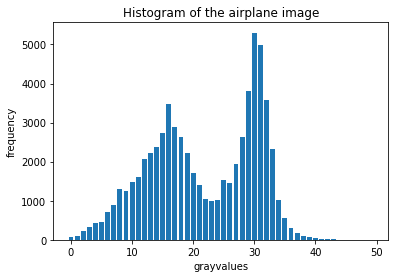

In [ ]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods fpr displaying a histogram
plt.bar(range(50),hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('grayvalues')
plt.ylabel('frequency')

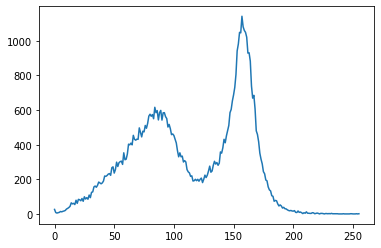

In [ ]:
hist,bins=np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Another example.

In [ ]:
#let read another two images
high = cv2.imread('/content/4b5683c4-ef68-4439-b346-f76ea2c651da___JR_FrgE.S 8639.JPG')
low = cv2.imread('/content/4c42eeae-508c-4ccd-b2d8-b720808bc28c___JR_FrgE.S 3020.JPG')

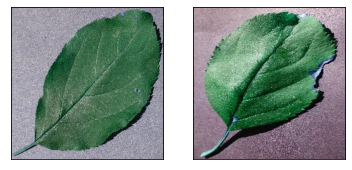

In [ ]:
#show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]),plt.yticks([])
plt.show()

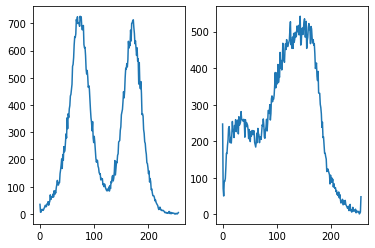

In [24]:
# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

## **2-Cumulative histogram of an image**

Calculate cumulative distribution function (CDF) of an image

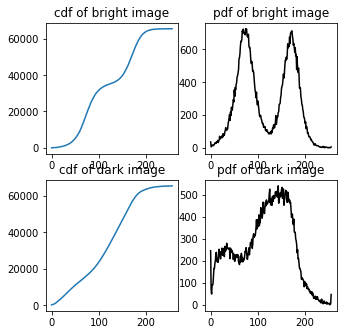

In [25]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

### **3-Histogram manipulation**

In order to continue image manipulation, first of all, we change the RGB images to grayscale using cv2.cvtColor().

In [26]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

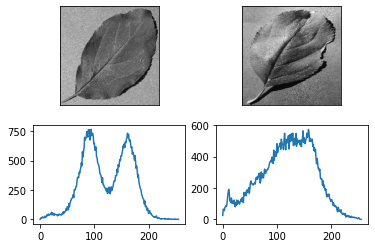

In [27]:
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

## **3-1 Brightness**

In order to change the brightness and contrast of an image, two parameters are often used as alpha and beta for contrast and brightness, respectively.

manip_image(image, alpha, beta) function gets  and  and produces the output image.

In [28]:
# Define a function to easily handle manipulation.
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image

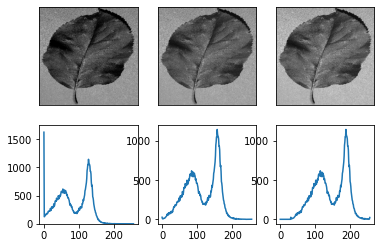

In [29]:
# Test on the image
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

You can see the histogram forward and backward shifts. When we increase and decrease brightness, histogram moves to brighter and darker regions, respectively.

([<matplotlib.lines.Line2D at 0x7f1f0d5e7450>], (0.0, 1100.0))

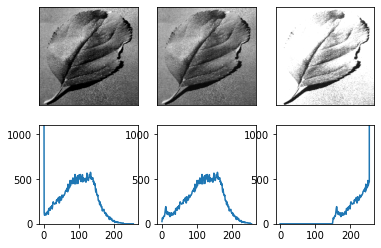

In [30]:
# Test on the dark image
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

## **3-2 Contrast**

Contrast of an image could be defined in different ways

(0.0, 1750.0)

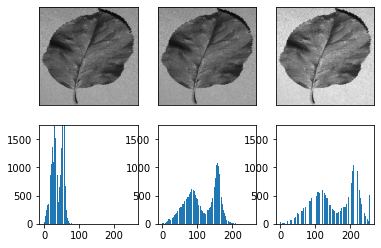

In [31]:
# Test on the image
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

## **Histogram equalization**

One usual method to stretch the intensity values of an image in order to make its histogram similar to the perfect histogram shape (uniformly distributed), is the histogram equalization. In this method, image histogram will be stretched with respect to its cumulative distribution function. Very good explanation of histogram equalization is found in here.

cv2.equalizeHist(src[, dst])

src : the only required argument is the original image to be equalized.

<BarContainer object of 256 artists>

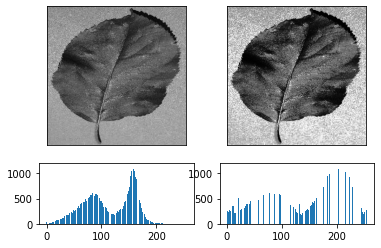

In [32]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())


## **CLAHE (Contrast Limited Adaptive Histogram Equalization)**

As you can see above, some parts of the image are brighter than the other parts in the equalized image. In order to reduce these artifacts in image enhancement, an adaptive algorithm was developed. This algorithm performs the same histogram equalization, but in small tiles of the image; resulting in better visual feelings.

To perform CLAHE, a CLAHE object should be created first. Then it is applied over the image. Two parameters, the tile number and limit should be specified.

You can try different tile sizes and limits and check the enhancement of image.

<BarContainer object of 256 artists>

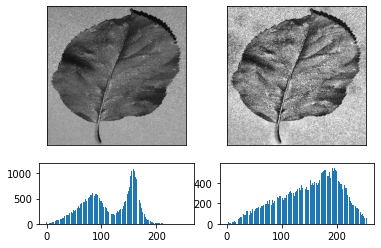

In [33]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())